<a href="https://colab.research.google.com/github/nikhilans/team-mind-worldbankdata/blob/main/CH_Team_Mind_Capstone_Project_1_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [36]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Reading data from the csv files
df_country_series = pd.read_csv('/content/drive/MyDrive/AlmaBetter - Cohort Himalaya/Module 1: Python for Data Science/World Bank Global Education Analysis/data/EdStatsCountry-Series.csv')
df_country = pd.read_csv('/content/drive/MyDrive/AlmaBetter - Cohort Himalaya/Module 1: Python for Data Science/World Bank Global Education Analysis/data/EdStatsCountry.csv')
df_data = pd.read_csv('/content/drive/MyDrive/AlmaBetter - Cohort Himalaya/Module 1: Python for Data Science/World Bank Global Education Analysis/data/EdStatsData.csv')
df_footnote = pd.read_csv('/content/drive/MyDrive/AlmaBetter - Cohort Himalaya/Module 1: Python for Data Science/World Bank Global Education Analysis/data/EdStatsFootNote.csv')
df_series = pd.read_csv('/content/drive/MyDrive/AlmaBetter - Cohort Himalaya/Module 1: Python for Data Science/World Bank Global Education Analysis/data/EdStatsSeries.csv')

Initial understanding of each of the datasets:

* df_country(EdStatsCountry.csv) - contains list of all countries that are present in the data (total of 241 countries) - along with other features specific to the country like - Region, Income Group specific to the country etc
* df_data(EdStatsData.csv) - contains each country, with list of indicators (3665 unique indicators); contains measurement value for each indicator from years 1970 to 2017; from 2020 to 2100 - contains projections
* df_series - contains list of all indicators and the definition of each indicator
* df_countryseries - contains indicators and data sources for certain countries
* df_footnote - contains the estimations and uncertainty bounds for each year - looks like some years are missing

### Let's now look at the datasets in brief. We're considering the EdStatsData csv file as the main dataset since it has relevant information about indicators across various years.

In [39]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [40]:
df_data.shape

(886930, 70)

In [41]:
df_data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [43]:
df_data['Indicator Name'].nunique()

3665

In [44]:
df_data['Country Code'].nunique()

242

### From our initial analysis, looks like there are a lot of missing values. So, let's look at how the data is actually distributed across various years.

In [45]:
# Let's look at which years have the least data available
years = df_data.iloc[:, 4:-1]
percent_missing = years.isnull().sum() * 100 / len(years)
percent_missing =  pd.DataFrame({'years': years.columns,
                                 'percent_missing': percent_missing})

percent_missing.T

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
years,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
percent_missing,91.8496,95.9933,95.984,95.9924,95.9715,90.1564,95.7738,95.7636,95.7634,95.8498,89.9516,95.628,95.7707,95.6637,95.6472,89.8193,95.5609,95.6433,95.6533,95.7674,85.9735,91.6073,91.4826,91.4545,91.2663,85.1892,91.3401,91.7183,90.4261,86.6011,80.0801,86.0745,85.9961,85.3018,85.4764,79.2421,84.18,84.5228,84.8481,83.9775,72.665,83.5374,83.3962,84.4961,87.1705,85.2234,98.1442,99.9839,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007


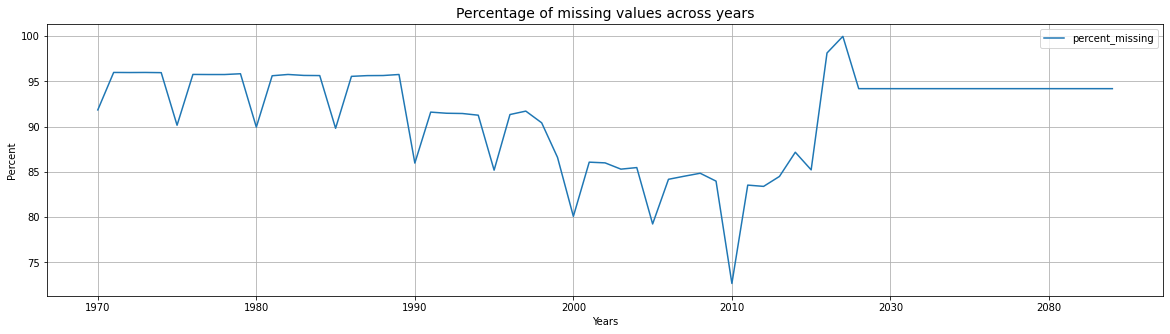

In [46]:
# Visualizing the percent of missing data across years
percent_missing.plot(figsize=(20,5), grid=True)
plt.title('Percentage of missing values across years', fontsize=14)
plt.xlabel('Years')
plt.ylabel('Percent')
plt.show()

In [47]:
# Subsetting data for years from 2020 - check what indicators they contain
df_data_subset2 = df_data[~df_data['2020'].isna()][['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100']]

In [48]:
df_data_subset2['Indicator Name'].unique()

array(['Wittgenstein Projection: Mean years of schooling. Age 0-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Female',
       'Wittgenstein Projection: Mean Years of Schooling. Age 15+. Gender Gap',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',
     

### The graph of percentage missing values shows the data distribution across various years. Here we infer that the years 2000 to 2015 have the most amount of data. Year 2010 on the whole has the most amount of data. As for years after 2020, they're all projections. as noted above. So, from here on out let's analyze data for years ranging from 2000 - 2015.

### Since 2010 has most amount of data about the indicators, Now let's look at the spread of data across various regions.

In [49]:
# Mapping the Region, Income Group and Special Notes based on Country Code
df1 = pd.merge(df_data, df_country[['Country Code', 'Region', 'Income Group', 'Special Notes']], how = 'left', on = 'Country Code').reset_index(drop=True)
df1.shape

(886930, 73)

In [50]:
# Excluding countries where Region is blank; after taking a look at the special notes, the countries with blank regions are mostly aggregates. 
df2 = df1[~df1['Region'].isna()]
gp1 = df1.groupby('Region')['2010'].count().reset_index()

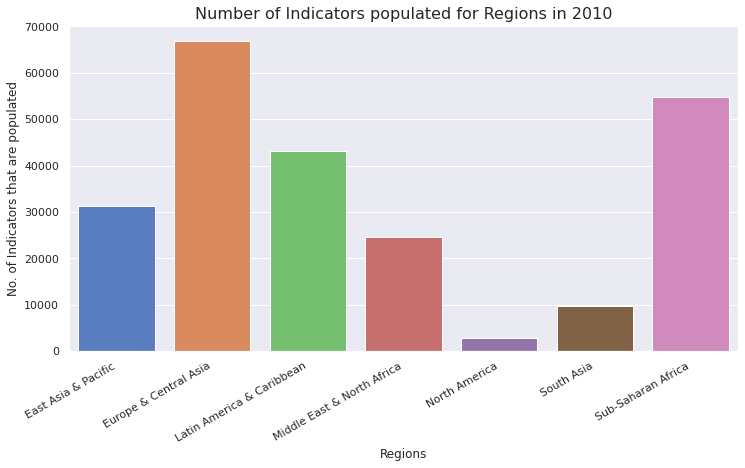

In [51]:
# Visualizing which regions have most data available for year 2010

sns.set_theme()
fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette("muted")
ax = sns.barplot(x="Region", y="2010", data=gp1, palette=colors)
ax.set(xlabel='Regions',ylabel='No. of Indicators that are populated')
ax.set_title('Number of Indicators populated for Regions in 2010', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

### We can see that Europe and Central Asia have the most amount of information, while North America has the least. This can be because North America have fewer countries.

### **1.Expenditure on education as % of total government expenditure (%) and Correlation between youth/adult literacy rate for countires with similar GDP per capita PPP**

In [52]:
# Function to get subsets of dataframe for specific indicators
def get_reqDF(df,col,indicator):
  count = 0
  my_list = []
  for elem in col:
    if indicator in elem:
      my_list.append(df.loc[count,:])     
    else:
      pass
    count = count + 1
  
  return pd.DataFrame(my_list).reset_index(drop=True)

In [53]:
df_expM = get_reqDF(df_data,df_data['Indicator Name'],'Expenditure')

In [54]:
df_expM.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Expenditure on education not allocated by leve...,UIS.XPUBP.UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_expM['Indicator Name'].unique()

array(['Expenditure on education as % of total government expenditure (%)',
       'Expenditure on education not allocated by level as % of government expenditure on education (%)',
       'Expenditure on lower secondary as % of government expenditure on education (%)',
       'Expenditure on lower secondary as % of total government expenditure (%)',
       'Expenditure on post-secondary non-tertiary as % of government expenditure on education (%)',
       'Expenditure on post-secondary non-tertiary as % of total government expenditure (%)',
       'Expenditure on pre-primary as % of government expenditure on education (%)',
       'Expenditure on pre-primary as % of total government expenditure (%)',
       'Expenditure on primary as % of government expenditure on education (%)',
       'Expenditure on primary as % of total government expenditure (%)',
       'Expenditure on secondary and post-secondary non-tertiary vocational as % of government expenditure on education (%)',
       '

### Looks like there are many differect variations of expenditure, for now we'll take expenditure on education in general.

In [56]:
df_exp = df_expM[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2010']]
df_exp = df_exp[~df_exp['2010'].isna()]

In [57]:
df_exp.sort_values('Country Name').sort_values('2010',ascending=False)

,Country Name,Country Code,Indicator Name,Indicator Code,2010
1718,"Gambia, The",GMB,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,65.328453
458,Afghanistan,AFG,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,62.136471
3032,Niger,NER,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,60.977890
998,Burkina Faso,BFA,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,60.341160
2942,Nepal,NPL,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,55.701241
...,...,...,...,...,...
2957,Netherlands,NLD,Expenditure on post-secondary non-tertiary as ...,UIS.XGOVEXP.IMF.4,0.009290
3209,Peru,PER,Expenditure on post-secondary non-tertiary as ...,UIS.XGOVEXP.IMF.4,0.008060
2525,Luxembourg,LUX,Expenditure on post-secondary non-tertiary as ...,UIS.XGOVEXP.IMF.4,0.005800
1015,Burundi,BDI,Expenditure on pre-primary as % of total gover...,UIS.XGOVEXP.IMF.0,0.003860


In [58]:
df_exp[df_exp['Country Name'] == 'India'].sort_values('2010',ascending=False)

,Country Name,Country Code,Indicator Name,Indicator Code,2010
2046,India,IND,Expenditure on secondary as % of government ex...,SE.XPD.SECO.ZS,36.985199
2048,India,IND,Expenditure on tertiary as % of government exp...,SE.XPD.TERT.ZS,36.076519
2050,India,IND,Expenditure on upper secondary as % of governm...,UIS.XPUBP.3,26.096001
2042,India,IND,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,25.206591
2034,India,IND,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,11.742780
2036,India,IND,Expenditure on lower secondary as % of governm...,UIS.XPUBP.2,10.889210
2047,India,IND,Expenditure on secondary as % of total governm...,UIS.XGOVEXP.IMF.23,4.343090
2049,India,IND,Expenditure on tertiary as % of total governme...,UIS.XGOVEXP.IMF.56,4.236390
2051,India,IND,Expenditure on upper secondary as % of total g...,UIS.XGOVEXP.IMF.3,3.064400
2043,India,IND,Expenditure on primary as % of total governmen...,UIS.XGOVEXP.IMF.1,2.959950


In [59]:
exp_list = ['Expenditure on primary as % of total government expenditure (%)',\
            'Expenditure on secondary as % of total government expenditure (%)','Expenditure on tertiary as % of total government expenditure (%)']

In [60]:
df_exp_2 = df_exp[df_exp['Indicator Name'].isin(exp_list)].sort_values('Country Name')

In [61]:
countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka', 'China']

In [62]:
df_exp_edu = df_exp_2[df_exp_2['Country Name'].isin(countries)]
df_exp_edu

,Country Name,Country Code,Indicator Name,Indicator Code,2010
733,Bangladesh,BGD,Expenditure on secondary as % of total governm...,UIS.XGOVEXP.IMF.23,7.70126
735,Bangladesh,BGD,Expenditure on tertiary as % of total governme...,UIS.XGOVEXP.IMF.56,2.05513
855,Bhutan,BTN,Expenditure on primary as % of total governmen...,UIS.XGOVEXP.IMF.1,3.81926
859,Bhutan,BTN,Expenditure on secondary as % of total governm...,UIS.XGOVEXP.IMF.23,6.87426
861,Bhutan,BTN,Expenditure on tertiary as % of total governme...,UIS.XGOVEXP.IMF.56,1.92802
2043,India,IND,Expenditure on primary as % of total governmen...,UIS.XGOVEXP.IMF.1,2.95995
2047,India,IND,Expenditure on secondary as % of total governm...,UIS.XGOVEXP.IMF.23,4.34309
2049,India,IND,Expenditure on tertiary as % of total governme...,UIS.XGOVEXP.IMF.56,4.23639
2949,Nepal,NPL,Expenditure on tertiary as % of total governme...,UIS.XGOVEXP.IMF.56,2.21720
3687,Sri Lanka,LKA,Expenditure on tertiary as % of total governme...,UIS.XGOVEXP.IMF.56,1.41375


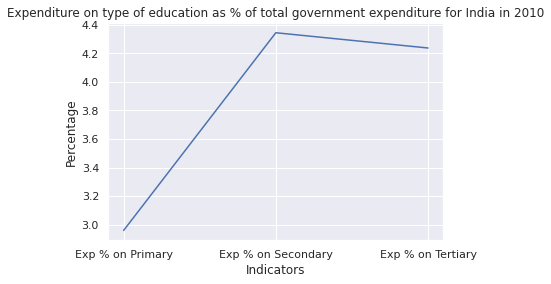

In [63]:
plt.plot(df_exp_edu[df_exp_edu['Country Name'] == 'India']['Indicator Name'], df_exp_edu[df_exp_edu['Country Name'] == 'India']['2010'])
plt.xticks([0,1,2],labels=['Exp % on Primary', 'Exp % on Secondary','Exp % on Tertiary'])
plt.title('Expenditure on type of education as % of total government expenditure for India in 2010')
plt.ylabel('Percentage')
plt.xlabel('Indicators')
plt.show()

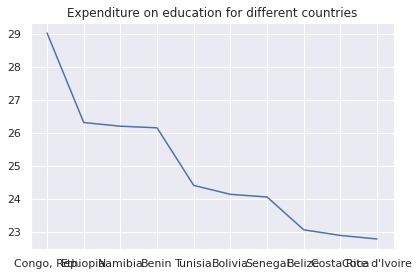

In [64]:
df_top_exp = df_exp[df_exp['Indicator Name'] == 'Expenditure on education as % of total government expenditure (%)'].sort_values('2010',ascending=False)[0:10]
plt.plot(df_top_exp['Country Name'],df_top_exp['2010'])
plt.rcParams['figure.figsize'] = [10, 8]
plt.title('Expenditure on education for different countries')
plt.tight_layout()

### **Now, let's go for GDP vs Literacy Rate analysis.**

In [65]:
# Subset of original DF of GDP 
gdp_df = df_data.loc[df_data['Indicator Name'] == 'GDP per capita, PPP (current international $)'][['Country Name','Indicator Name' ,'2010']]
gdp_df = gdp_df[~gdp_df['2010'].isna()]
gdp_df.rename(columns={'2010':'GDP_2010'}, inplace=True)

In [66]:
# Indicators for Literacy rate to consider
Literacy_list = ['Youth literacy rate, population 15-24 years, both sexes (%)', 
         'Adult literacy rate, population 15+ years, both sexes (%)', 'Literacy rate, population 25-64 years, both sexes (%)', 
         'Elderly literacy rate, population 65+ years, both sexes (%)']

In [67]:
# Literacy rate subset 
Literacy_df = df_data.loc[df_data['Indicator Name'].isin(Literacy_list)][['Country Name', 'Indicator Name', '2010']]
Literacy_df = Literacy_df[~Literacy_df['2010'].isna()]
Literacy_df.rename(columns={'2010':'LiteracyRate_2010'}, inplace=True)

In [68]:
# Merging GDP subset and Literacy rate subset to get a correlation heatmap
df_Lit_GDP = pd.merge(gdp_df, Literacy_df.pivot(index='Country Name', columns='Indicator Name', values='LiteracyRate_2010').reset_index(), how='inner', on='Country Name')

In [69]:
df_Lit_GDP.head()

,Country Name,Indicator Name,GDP_2010,"Adult literacy rate, population 15+ years, both sexes (%)","Elderly literacy rate, population 65+ years, both sexes (%)","Literacy rate, population 25-64 years, both sexes (%)","Youth literacy rate, population 15-24 years, both sexes (%)"
0,Arab World,"GDP per capita, PPP (current international $)",14444.665884,77.364586,NaN,NaN,88.964699
1,East Asia & Pacific,"GDP per capita, PPP (current international $)",11724.724549,95.108223,NaN,NaN,99.004402
2,East Asia & Pacific (excluding high income),"GDP per capita, PPP (current international $)",8746.749009,94.751671,72.72614,NaN,98.969109
3,Europe & Central Asia,"GDP per capita, PPP (current international $)",26037.458465,98.997589,NaN,NaN,99.711449
4,Europe & Central Asia (excluding high income),"GDP per capita, PPP (current international $)",15251.807727,98.799637,NaN,NaN,99.626114


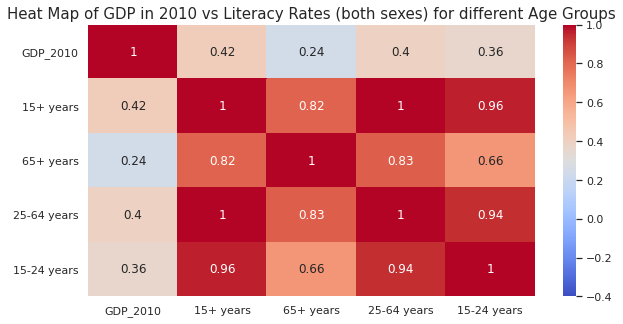

In [107]:
# Correlation heatmap (GDP vs Literacy Rate)
plt.rcParams['figure.figsize'] = [10, 5]

x_axis_labels = ['GDP_2010', '15+ years', '65+ years', '25-64 years', '15-24 years'] # labels for x-axis
y_axis_labels = ['GDP_2010', '15+ years', '65+ years', '25-64 years', '15-24 years'] # labels for y-axis

sns.heatmap(df_Lit_GDP.corr(), vmin=-0.4, cmap='coolwarm', annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.title('Heat Map of GDP in 2010 vs Literacy Rates (both sexes) for different Age Groups', fontsize=15)
plt.show()

###**Let's look at the correlation more closely with a scatter plot.**

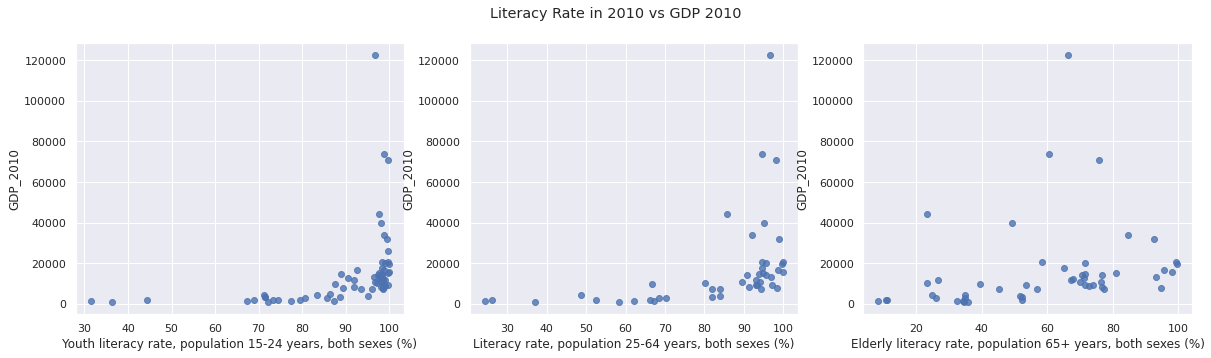

In [71]:
fig, axes = plt.subplots(1,3, figsize=(20, 5))

plt.suptitle('Literacy Rate in 2010 vs GDP 2010')

sns.regplot(ax=axes[0], x='Youth literacy rate, population 15-24 years, both sexes (%)', y='GDP_2010', fit_reg=False, data=df_Lit_GDP)
sns.regplot(ax=axes[1], x='Literacy rate, population 25-64 years, both sexes (%)', y='GDP_2010', fit_reg=False, data=df_Lit_GDP)
sns.regplot(ax=axes[2], x='Elderly literacy rate, population 65+ years, both sexes (%)', y='GDP_2010', fit_reg=False, data=df_Lit_GDP)

plt.show()

### Can't really make out the correlation shown in the graph because of outliers present. The countries with enormous GDP will have a high literacy rate for sure, hence let's consider countries with GDP less than USD 20000. There might be a correlation here.

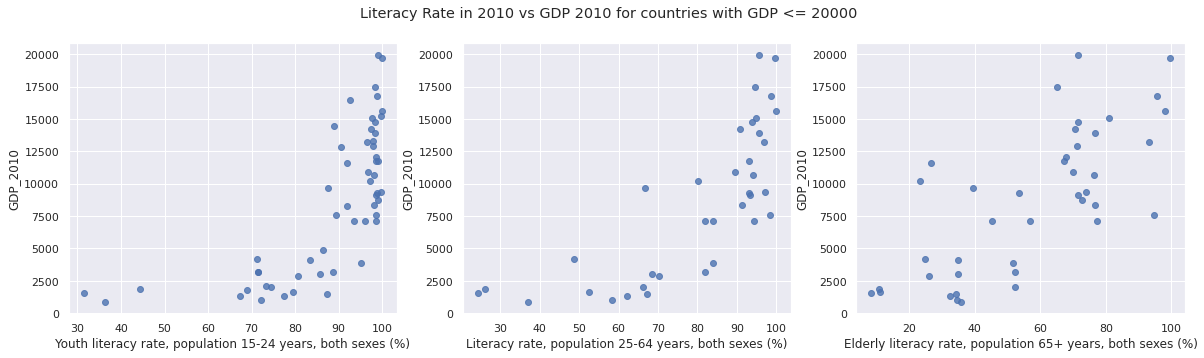

In [72]:
fig, axes = plt.subplots(1,3, figsize=(20, 5))
plt.suptitle('Literacy Rate in 2010 vs GDP 2010 for countries with GDP <= 20000')

sns.regplot(ax=axes[0], x='Youth literacy rate, population 15-24 years, both sexes (%)', y='GDP_2010', fit_reg=False, data=df_Lit_GDP[df_Lit_GDP['GDP_2010'] <= 20000])
sns.regplot(ax=axes[1], x='Literacy rate, population 25-64 years, both sexes (%)', y='GDP_2010', fit_reg=False, data=df_Lit_GDP[df_Lit_GDP['GDP_2010'] <= 20000])
sns.regplot(ax=axes[2], x='Elderly literacy rate, population 65+ years, both sexes (%)', y='GDP_2010', fit_reg=False, data=df_Lit_GDP[df_Lit_GDP['GDP_2010'] <= 20000])

plt.show()

### Okay, there is a correlation here. Countries with higher GDP have a higher literacy rate.

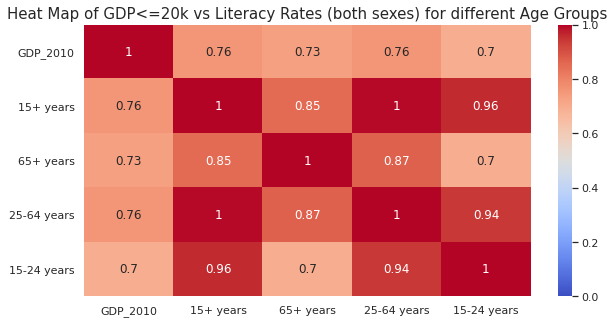

In [108]:
#Correlation without outliers

x_axis_labels = ['GDP_2010', '15+ years', '65+ years', '25-64 years', '15-24 years'] # labels for x-axis
y_axis_labels = ['GDP_2010', '15+ years', '65+ years', '25-64 years', '15-24 years'] # labels for y-axis
sns.heatmap(df_Lit_GDP[df_Lit_GDP['GDP_2010'] <= 20000].corr(), vmin=0, cmap='coolwarm', annot=True,  xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Heat Map of GDP<=20k vs Literacy Rates (both sexes) for different Age Groups', fontsize=15)
plt.show()


### **2.1 How does India compare to it's neighboring countries or countries with similar GDP in it's literacy rate**


In [74]:
# Literacy rate subset
df_Literacy = get_reqDF(df_data,df_data['Indicator Name'],'literacy')
df_Literacy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    7986 non-null   object 
 1   Country Code    7986 non-null   object 
 2   Indicator Name  7986 non-null   object 
 3   Indicator Code  7986 non-null   object 
 4   1970            36 non-null     float64
 5   1971            0 non-null      float64
 6   1972            0 non-null      float64
 7   1973            0 non-null      float64
 8   1974            0 non-null      float64
 9   1975            60 non-null     float64
 10  1976            88 non-null     float64
 11  1977            12 non-null     float64
 12  1978            24 non-null     float64
 13  1979            76 non-null     float64
 14  1980            224 non-null    float64
 15  1981            198 non-null    float64
 16  1982            76 non-null     float64
 17  1983            24 non-null     f

In [75]:
df_Literacy_1 = df_Literacy.loc[df_Literacy['Country Code'].isin(['IND', 'NPL', 'PAK', 'CHN', 'BGD'])][['Country Name','Country Code','Indicator Name', '2011']]

In [76]:
df_Literacy_1[~df_Literacy_1['2011'].isna()].sort_values('Indicator Name',ascending=False)

,Country Name,Country Code,Indicator Name,2011
5741,Pakistan,PAK,"Youth literacy rate, population 15-24 years, m...",78.04242
5411,Nepal,NPL,"Youth literacy rate, population 15-24 years, m...",89.88402
3761,India,IND,"Youth literacy rate, population 15-24 years, m...",90.04483
1352,Bangladesh,BGD,"Youth literacy rate, population 15-24 years, m...",55.75393
1351,Bangladesh,BGD,"Youth literacy rate, population 15-24 years, g...",1.30305
5410,Nepal,NPL,"Youth literacy rate, population 15-24 years, g...",0.89234
5740,Pakistan,PAK,"Youth literacy rate, population 15-24 years, g...",0.80901
3760,India,IND,"Youth literacy rate, population 15-24 years, g...",0.90899
5739,Pakistan,PAK,"Youth literacy rate, population 15-24 years, f...",63.13681
5409,Nepal,NPL,"Youth literacy rate, population 15-24 years, f...",80.20683


### We have more data in the Adult literacy rate indicator, let's do an analysis for that.

In [77]:
# Adult Literacy rate subset
df_Literacy[df_Literacy['Indicator Name'] == 'Adult literacy rate, population 15+ years, both sexes (%)'].info()
df_literacy_2011 = df_Literacy[df_Literacy['Indicator Name'] == 'Adult literacy rate, population 15+ years, both sexes (%)'][['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2011']]
df_literacy_2011 = df_literacy_2011[~df_literacy_2011['2011'].isna()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 7953
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    242 non-null    object 
 1   Country Code    242 non-null    object 
 2   Indicator Name  242 non-null    object 
 3   Indicator Code  242 non-null    object 
 4   1970            3 non-null      float64
 5   1971            0 non-null      float64
 6   1972            0 non-null      float64
 7   1973            0 non-null      float64
 8   1974            0 non-null      float64
 9   1975            6 non-null      float64
 10  1976            8 non-null      float64
 11  1977            1 non-null      float64
 12  1978            2 non-null      float64
 13  1979            7 non-null      float64
 14  1980            20 non-null     float64
 15  1981            19 non-null     float64
 16  1982            7 non-null      float64
 17  1983            2 non-null      fl

In [78]:
countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka', 'China']

In [79]:
 count = 0
 list_co = []
 for record in df_literacy_2011.sort_values('2011',ascending=False)['Country Name']:
   if record in countries:
     list_co.append(df_literacy_2011.sort_values('2011',ascending=False).reset_index(drop=True).loc[count,:])
   count = count + 1 

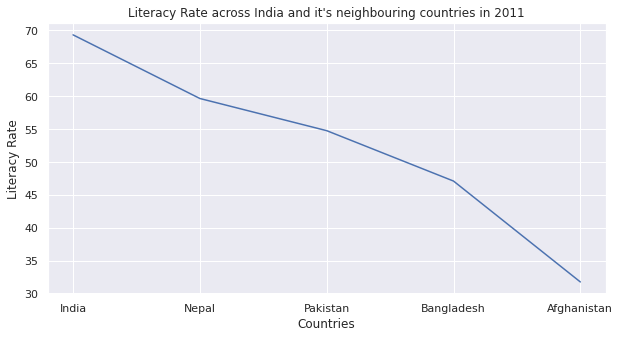

In [80]:
# Plot for Literacy Rate across countries in consideration
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(pd.DataFrame(list_co)[['Country Name', '2011']].set_index('Country Name'))
plt.title("Literacy Rate across India and it's neighbouring countries in 2011")
plt.xlabel('Countries')
plt.ylabel('Literacy Rate')
plt.show()

### **2.2 Comparing India with neighboring countries - Pakistan, Nepal, Bhutan, China, Sri Lanka in Gross Enrolment Ratio**
Gross Enrolement Ratio = Total enrollment in pre-primary education, regardless of age, expressed as a percentage of the total population of official pre-primary education age. GER can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition.

In [81]:
# Subset
ctr_df = df_data.loc[df_data['Country Code'].isin(['IND', 'NPL', 'PAK', 'CHN', 'BGD'])][['Country Name', 'Indicator Name', '2010']]

# filter for Indicators
list1 = ['Gross enrolment ratio, lower secondary, both sexes (%)', 'Gross enrolment ratio, primary, both sexes (%)', 'Gross enrolment ratio, secondary, both sexes (%)', 
         'Gross enrolment ratio, upper secondary, both sexes (%)']
filter1 = ctr_df.loc[ctr_df['Indicator Name'].isin(list1)]

In [82]:
# filter for 2010
filter2 = filter1.pivot(index='Indicator Name', columns='Country Name', values='2010').reset_index()
filter2['Levels'] = ['lower secondary', 'primary', 'secondary', 'upper secondary']
filter2

Country Name,Indicator Name,Bangladesh,China,India,Nepal,Pakistan,Levels
0,"Gross enrolment ratio, lower secondary, both s...",64.591141,103.071503,80.176369,77.193901,46.820122,lower secondary
1,"Gross enrolment ratio, primary, both sexes (%)",102.656288,112.473923,109.183647,142.285446,95.740982,primary
2,"Gross enrolment ratio, secondary, both sexes (%)",50.119419,84.921158,63.290939,58.793621,35.848461,secondary
3,"Gross enrolment ratio, upper secondary, both s...",39.382790,69.903603,50.259708,43.521389,27.357670,upper secondary


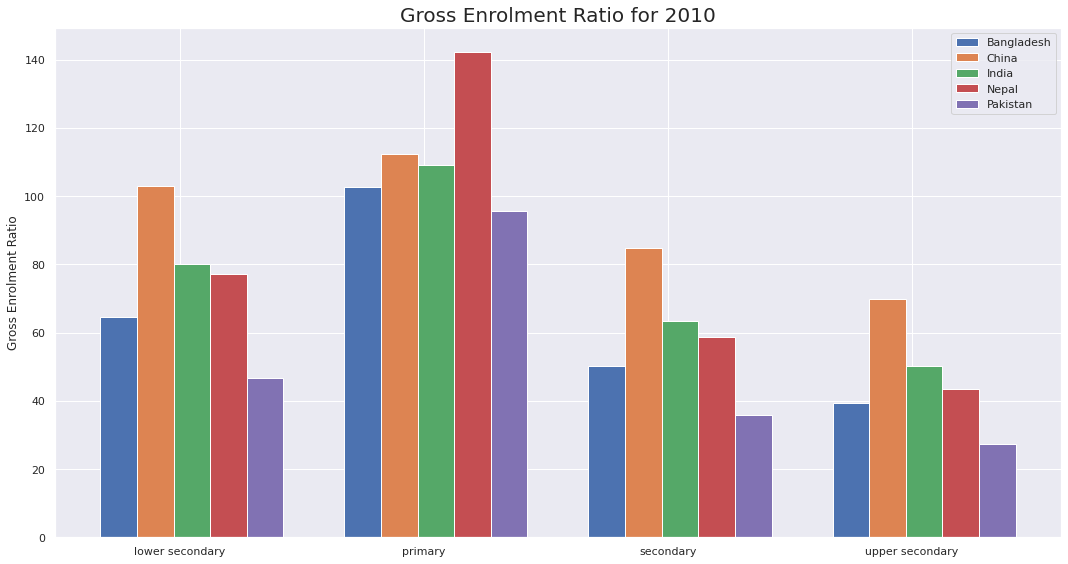

In [83]:
# Plot for Gross Enrollment Ratio across all these countries
labels = list(filter2['Levels'])
Bangladesh = list(filter2['Bangladesh'])
China = list(filter2['China'])
India = list(filter2['India'])
Nepal = list(filter2['Nepal'])
Pakistan = list(filter2['Pakistan'])

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x+width, Bangladesh, width, label='Bangladesh')
rects2 = ax.bar(x+2*width, China, width, label='China')
rects3 = ax.bar(x+3*width, India, width, label='India')
rects4 = ax.bar(x+4*width, Nepal, width, label='Nepal')
rects5 = ax.bar(x+5*width, Pakistan, width, label='Pakistan')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gross Enrolment Ratio')
ax.set_title('Gross Enrolment Ratio for 2010', fontsize=20)
ax.set_xticks(x+0.4)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

### **3. Comparing performance in PISA and TIMSS <br>
Variation in performance of Females and Males in PISA - from 2000 to 2015 <br>
Variation in PISA performance across different countries - for 2015 <br>
Vaiation in TIMSS performance across different countries - for 2015

**PISA:**
The Program for International Student Assessment (PISA) is an international assessment that measures 15-year-old students' reading, mathematics, and science literacy every three years.

**TIMSS:** The Trends in International Mathematics and Science Study (TIMSS) provides reliable and timely trend data on the mathematics and science achievement of U.S. students compared to that of students in other countries.

In [84]:
# List of relevant PISA indicators
list_PISA = ['PISA: Mean performance on the mathematics scale. Female', 'PISA: Mean performance on the mathematics scale. Male', 
        'PISA: Mean performance on the reading scale. Female', 'PISA: Mean performance on the reading scale. Male', 
        'PISA: Mean performance on the science scale. Female', 'PISA: Mean performance on the science scale. Male']

filter_pisa = df2[df2['Indicator Name'].isin(list_PISA)]
filter_pisa = filter_pisa.drop(['Country Code', 'Indicator Code', 'Special Notes', 'Region'], axis=1)

In [85]:
# Dropping specific null values without losing relevant data
temp_a = filter_pisa[~filter_pisa['2015'].isna()].reset_index(drop=True)
temp_b = temp_a[~temp_a['2012'].isna()].reset_index(drop=True)
temp_c = temp_b[~temp_b['2009'].isna()].reset_index(drop=True)
temp_d = temp_c[~temp_c['2006'].isna()].reset_index(drop=True)
temp_e = temp_d[~temp_d['2003'].isna()].reset_index(drop=True)
temp_f = temp_e[~temp_e['2000'].isna()].reset_index(drop=True)
temp_f.shape

(196, 69)

In [86]:
PISA=temp_f.drop(['2001', '2002', '2004', '2005', '2007', '2008', '2010', '2011', '2013', '2014'], axis=1)
PISA['Income Group'].unique()

array(['High income: OECD', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income'], dtype=object)

In [87]:
a1 = PISA[['Income Group', 'Country Name']].drop_duplicates().reset_index(drop=True)
a2 = pd.DataFrame(a1.groupby('Income Group')['Country Name'].count()).reset_index()

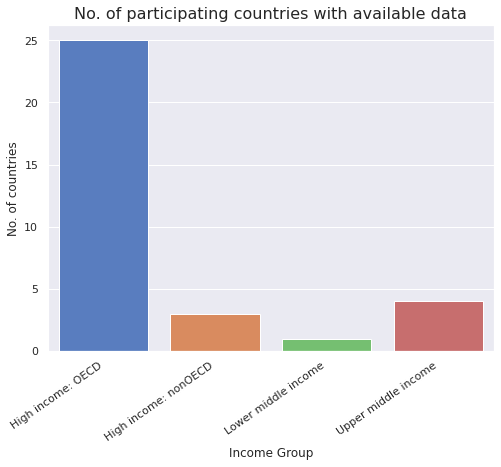

In [88]:
# Bar plot for no. of countries across income levels
sns.set_theme()
fig, ax = plt.subplots(figsize=(8,6))
colors = sns.color_palette("muted")
ax = sns.barplot(x='Income Group', y='Country Name', palette=colors, data=a2)
ax.set(xlabel='Income Group',ylabel='No. of countries')
ax.set_title('No. of participating countries with available data', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.show()

###**Let's look at PISA performance across genders.**

In [89]:
# Adding new columns to PISA df
PISA['gender'] = np.where(PISA['Indicator Name'].str.contains('Female'), 'female', 'male')
PISA['subject'] = np.where(PISA['Indicator Name'].str.contains('mathematics'), 'mathematics', np.where(PISA['Indicator Name'].str.contains('reading'), 'reading', 'science'))

In [90]:
pd.options.display.max_colwidth = 100
PISA[['Indicator Name', 'subject', 'gender']].drop_duplicates()

,Indicator Name,subject,gender
0,PISA: Mean performance on the mathematics scale. Female,mathematics,female
1,PISA: Mean performance on the mathematics scale. Male,mathematics,male
2,PISA: Mean performance on the reading scale. Female,reading,female
3,PISA: Mean performance on the reading scale. Male,reading,male
4,PISA: Mean performance on the science scale. Female,science,female
5,PISA: Mean performance on the science scale. Male,science,male


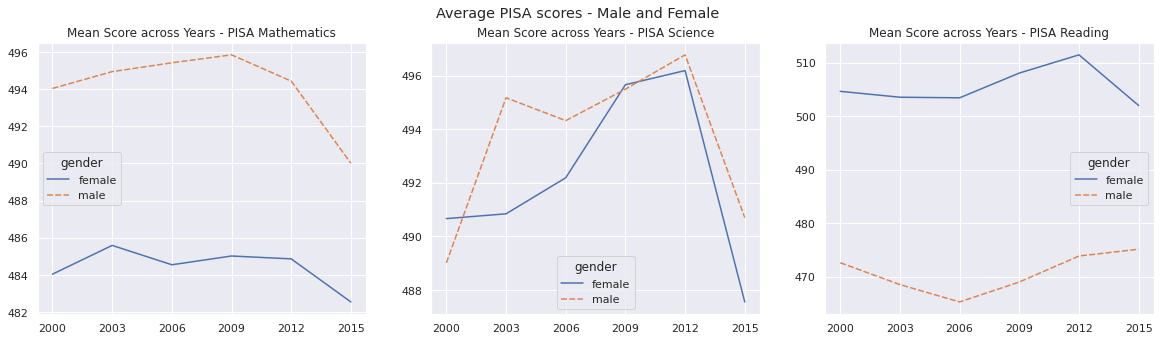

In [91]:
#Plotting avg PISA scores for male and female for various subjects - by taking the mean across the globe
math =  PISA[PISA['subject']=='mathematics'].drop(['Indicator Name','Country Name', 'Income Group', 'subject'], axis=1)
math1 = math.groupby('gender').mean().T

science =  PISA[PISA['subject']=='science'].drop(['Indicator Name','Country Name', 'Income Group', 'subject'], axis=1)
science1 = science.groupby('gender').mean().T

reading =  PISA[PISA['subject']=='reading'].drop(['Indicator Name','Country Name', 'Income Group', 'subject'], axis=1)
reading1 = reading.groupby('gender').mean().T

fig, axes = plt.subplots(1,3, figsize=(20, 5))

plt.suptitle('Average PISA scores - Male and Female')

sns.lineplot(ax=axes[0], data=math1)
sns.lineplot(ax=axes[1], data=science1)
sns.lineplot(ax=axes[2], data=reading1)

axes[0].set_title("Mean Score across Years - PISA Mathematics")
axes[1].set_title("Mean Score across Years - PISA Science")
axes[2].set_title("Mean Score across Years - PISA Reading")

plt.show()

In [92]:
# Create filters for the mean performance based on different subjects
list4 = ['PISA: Mean performance on the mathematics scale', 'PISA: Mean performance on the reading scale', 'PISA: Mean performance on the science scale']

filter1 = df2[df2['Indicator Name'].isin(list4)]
filter2 = filter1.drop(['Country Code', 'Indicator Code', 'Special Notes', 'Region'], axis=1)

a = filter2[~filter2['2015'].isna()].reset_index(drop=True)
b = a[~a['2012'].isna()].reset_index(drop=True)
c = b[~b['2009'].isna()].reset_index(drop=True)
d = c[~c['2006'].isna()].reset_index(drop=True)
e = d[~d['2003'].isna()].reset_index(drop=True)
f = e[~e['2000'].isna()].reset_index(drop=True)
f.shape

PISA=f.drop(['2001', '2002', '2004', '2005', '2007', '2008', '2010', '2011', '2013', '2014'], axis=1)

PISA['subject'] = np.where(PISA['Indicator Name'].str.contains('mathematics'), 'mathematics', np.where(PISA['Indicator Name'].str.contains('reading'), 'reading', 'science'))

In [93]:
PISA1 = PISA[['Country Name', 'subject', '2015']]
math = PISA1[PISA1['subject']=='mathematics'].sort_values(by='2015', ascending=False)
science = PISA1[PISA1['subject']=='science'].sort_values(by='2015', ascending=False)
reading = PISA1[PISA1['subject']=='reading'].sort_values(by='2015', ascending=False)

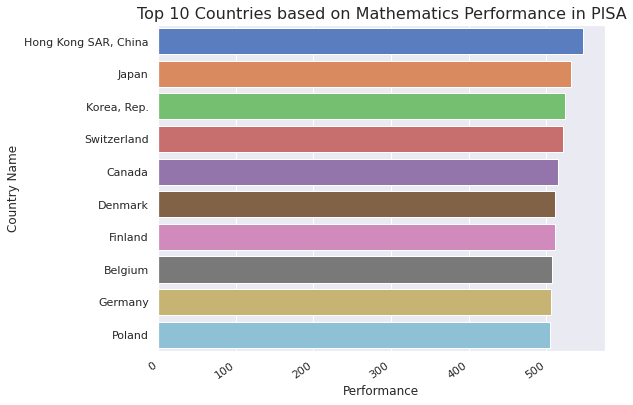

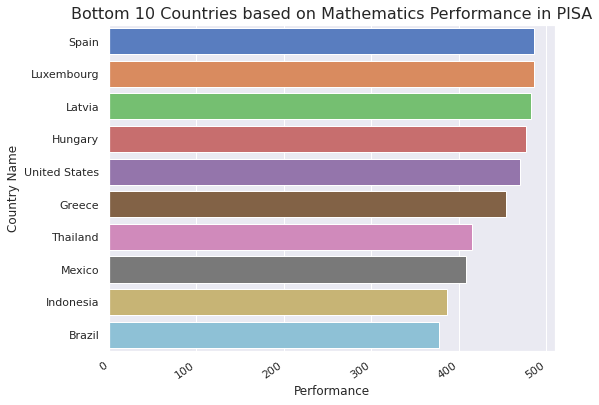

In [94]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(8,6))
colors = sns.color_palette("muted")
ax = sns.barplot(y='Country Name', x='2015', palette=colors, data=math[:10], orient='h')
ax.set(xlabel='Performance',ylabel='Country Name')
ax.set_title('Top 10 Countries based on Mathematics Performance in PISA', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.show()

sns.set_theme()
fig, ax = plt.subplots(figsize=(8,6))
colors = sns.color_palette("muted")
ax = sns.barplot(y='Country Name', x='2015', palette=colors, data=math[-10:], orient='h')
ax.set(xlabel='Performance',ylabel='Country Name')
ax.set_title('Bottom 10 Countries based on Mathematics Performance in PISA', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.show()

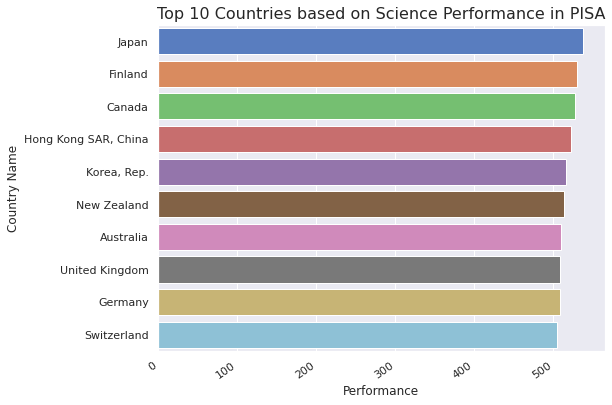

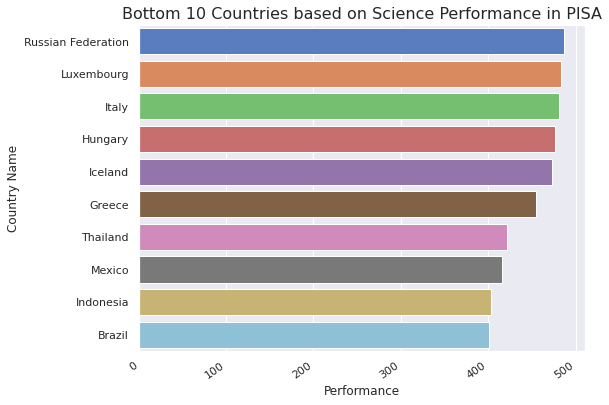

In [95]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(8,6))
colors = sns.color_palette("muted")
ax = sns.barplot(y='Country Name', x='2015', palette=colors, data=science[:10], orient='h')
ax.set(xlabel='Performance',ylabel='Country Name')
ax.set_title('Top 10 Countries based on Science Performance in PISA', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.show()

sns.set_theme()
fig, ax = plt.subplots(figsize=(8,6))
colors = sns.color_palette("muted")
ax = sns.barplot(y='Country Name', x='2015', palette=colors, data=science[-10:], orient='h')
ax.set(xlabel='Performance',ylabel='Country Name')
ax.set_title('Bottom 10 Countries based on Science Performance in PISA', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.show()

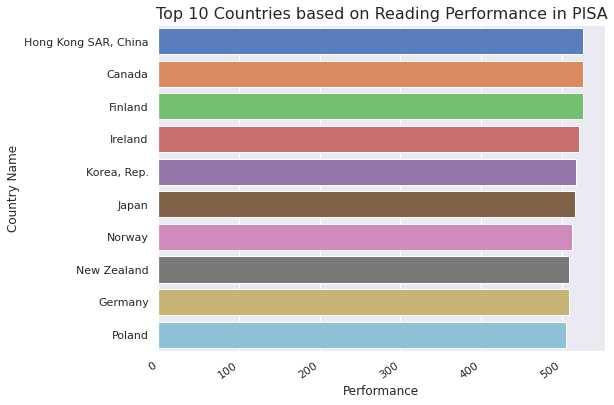

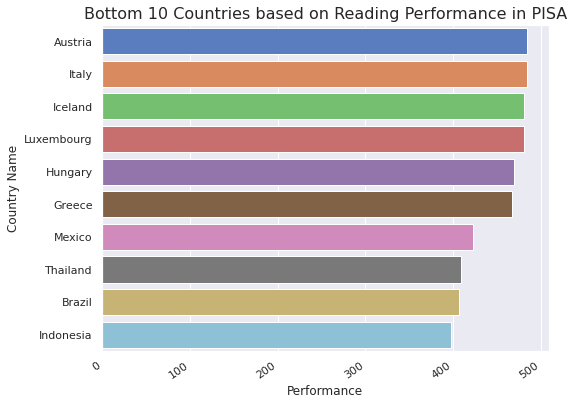

In [96]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(8,6))
colors = sns.color_palette("muted")
ax = sns.barplot(y='Country Name', x='2015', palette=colors, data=reading[:10], orient='h')
ax.set(xlabel='Performance',ylabel='Country Name')
ax.set_title('Top 10 Countries based on Reading Performance in PISA', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.show()

sns.set_theme()
fig, ax = plt.subplots(figsize=(8,6))
colors = sns.color_palette("muted")
ax = sns.barplot(y='Country Name', x='2015', palette=colors, data=reading[-10:], orient='h')
ax.set(xlabel='Performance',ylabel='Country Name')
ax.set_title('Bottom 10 Countries based on Reading Performance in PISA', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.show()

Now let's look at TIMSS performance scores

In [97]:
# Filtering the data for TIMSS and adding columns for grade and subjects
list5 = ['TIMSS: Mean performance on the mathematics scale for fourth grade students, total', 'TIMSS: Mean performance on the mathematics scale for eighth grade students, total',
        'TIMSS: Mean performance on the science scale for fourth grade students, total', 'TIMSS: Mean performance on the science scale for eighth grade students, total']

filter1 = df2[df2['Indicator Name'].isin(list5)]
filter2 = filter1[['Country Name', 'Indicator Name', '2015']].dropna()
filter3 = filter1[['Income Group', 'Indicator Name', '2015']].dropna()
filter2['subject'] = np.where(filter2['Indicator Name'].str.contains('mathematics'), 'mathematics', 'science')
filter2['grade'] = np.where(filter2['Indicator Name'].str.contains('eighth'), 'eight', 'four')
math = filter2[filter2['subject']=='mathematics'].sort_values(by='2015', ascending=False)
math4 = math[math['grade']=='four'].sort_values(by='2015', ascending=False)
math8 = math[math['grade']=='eight'].sort_values(by='2015', ascending=False)
science = filter2[filter2['subject']=='science'].sort_values(by='2015', ascending=False)
science4 = science[science['grade']=='four'].sort_values(by='2015', ascending=False)
science8 = science[science['grade']=='eight'].sort_values(by='2015', ascending=False)

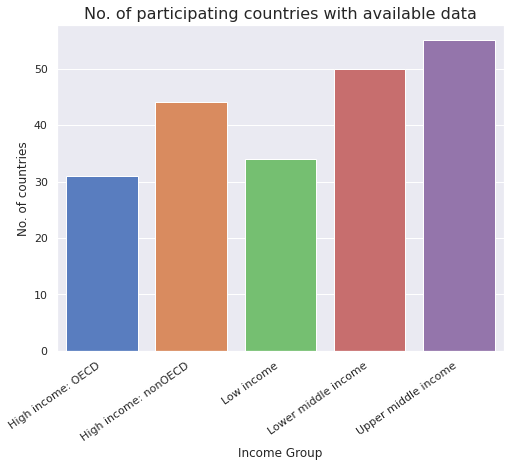

In [98]:
# Plotting the number of participating countries with data available
a1 = filter1[['Income Group', 'Country Name']].drop_duplicates().reset_index(drop=True)
a2 = pd.DataFrame(a1.groupby('Income Group')['Country Name'].count()).reset_index()

sns.set_theme()
fig, ax = plt.subplots(figsize=(8,6))
colors = sns.color_palette("muted")
ax = sns.barplot(x='Income Group', y='Country Name', palette=colors, data=a2)
ax.set(xlabel='Income Group',ylabel='No. of countries')
ax.set_title('No. of participating countries with available data', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.show()

### TIMSS data is available only for 4th grade and 8th grade, but since we considered PISA, which is a measure for students aged 15, we considered TIMSS data for fourth graders alone.

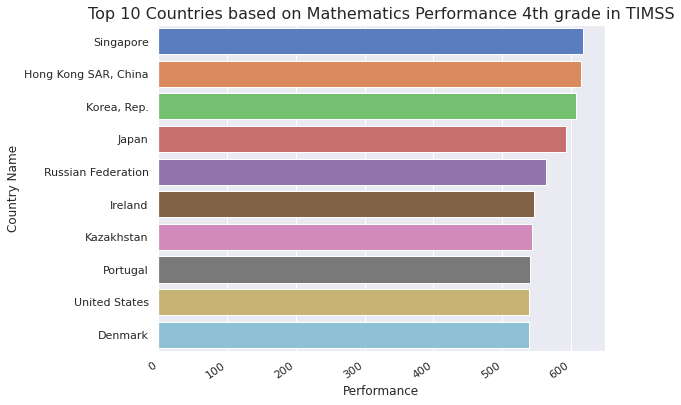

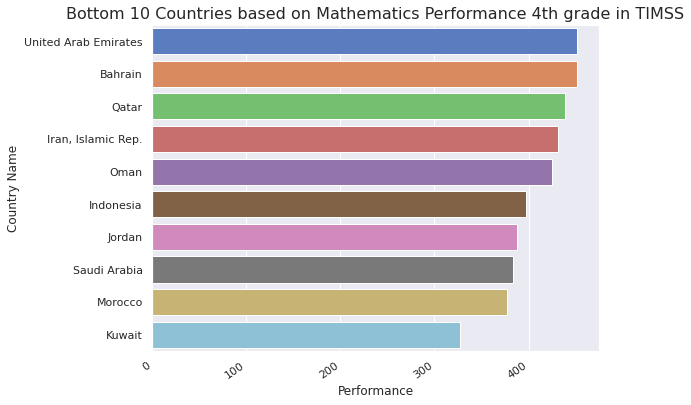

In [99]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(8,6))
colors = sns.color_palette("muted")
ax = sns.barplot(y='Country Name', x='2015', palette=colors, data=math4[:10], orient='h')
ax.set(xlabel='Performance',ylabel='Country Name')
ax.set_title('Top 10 Countries based on Mathematics Performance 4th grade in TIMSS', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.show()

sns.set_theme()
fig, ax = plt.subplots(figsize=(8,6))
colors = sns.color_palette("muted")
ax = sns.barplot(y='Country Name', x='2015', palette=colors, data=math4[-10:], orient='h')
ax.set(xlabel='Performance',ylabel='Country Name')
ax.set_title('Bottom 10 Countries based on Mathematics Performance 4th grade in TIMSS', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.show()

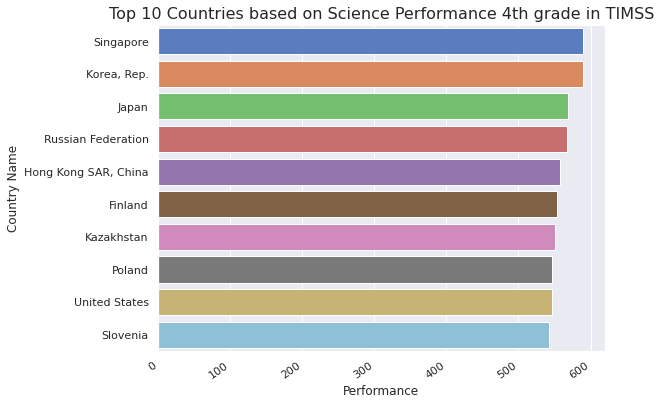

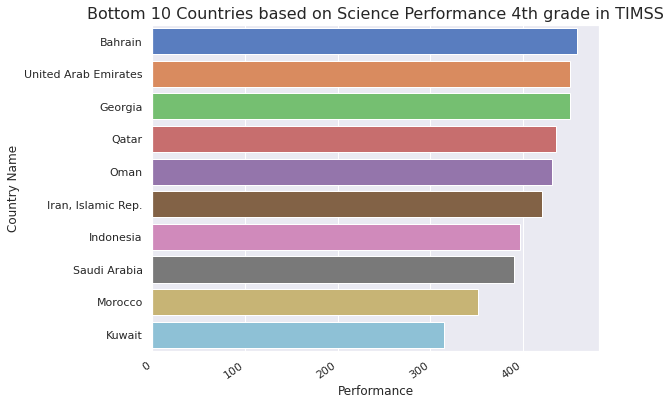

In [100]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(8,6))
colors = sns.color_palette("muted")
ax = sns.barplot(y='Country Name', x='2015', palette=colors, data=science4[:10], orient='h')
ax.set(xlabel='Performance',ylabel='Country Name')
ax.set_title('Top 10 Countries based on Science Performance 4th grade in TIMSS', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.show()

sns.set_theme()
fig, ax = plt.subplots(figsize=(8,6))
colors = sns.color_palette("muted")
ax = sns.barplot(y='Country Name', x='2015', palette=colors, data=science4[-10:], orient='h')
ax.set(xlabel='Performance',ylabel='Country Name')
ax.set_title('Bottom 10 Countries based on Science Performance 4th grade in TIMSS', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.show()

### **4. Relationship between internet users and literacy rate.**

In [101]:
# Internet subset df
df_internet = get_reqDF(df_data,df_data['Indicator Name'],'Internet')
df_internet.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [102]:
df_internet = df_internet[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']]

In [103]:
# Merging info for internet users vs literacy rate analysis
lit_int_df = pd.merge(df_internet[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2011']], df_literacy_2011, on =['Country Name','Country Code'], suffixes = ('_internetUsers','_literacy'))

In [104]:
lit_int_df.head()

,Country Name,Country Code,Indicator Name_internetUsers,Indicator Code_internetUsers,2011_internetUsers,Indicator Name_literacy,Indicator Code_literacy,2011_literacy
0,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,29.707761,"Adult literacy rate, population 15+ years, both sexes (%)",SE.ADT.LITR.ZS,77.364586
1,East Asia & Pacific,EAS,Internet users (per 100 people),IT.NET.USER.P2,37.365156,"Adult literacy rate, population 15+ years, both sexes (%)",SE.ADT.LITR.ZS,95.108223
2,East Asia & Pacific (excluding high income),EAP,Internet users (per 100 people),IT.NET.USER.P2,32.385761,"Adult literacy rate, population 15+ years, both sexes (%)",SE.ADT.LITR.ZS,94.751671
3,Europe & Central Asia,ECS,Internet users (per 100 people),IT.NET.USER.P2,58.834630,"Adult literacy rate, population 15+ years, both sexes (%)",SE.ADT.LITR.ZS,98.997589
4,Europe & Central Asia (excluding high income),ECA,Internet users (per 100 people),IT.NET.USER.P2,40.787203,"Adult literacy rate, population 15+ years, both sexes (%)",SE.ADT.LITR.ZS,98.799637


In [105]:
# Correlation of internet users vs literacy rate
lit_int_df.corr()

,2011_internetUsers,2011_literacy
2011_internetUsers,1.000000,0.729788
2011_literacy,0.729788,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


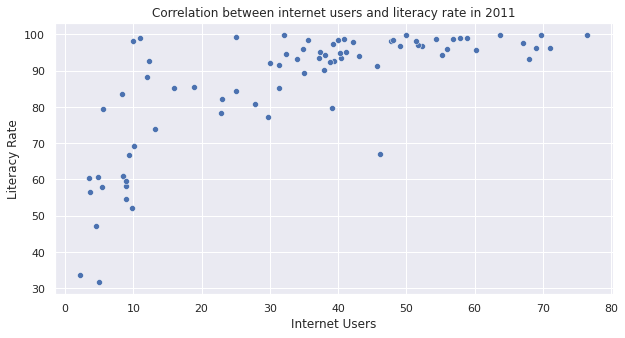

In [106]:
sns.scatterplot('2011_internetUsers','2011_literacy',data=lit_int_df)
plt.title('Correlation between internet users and literacy rate in 2011')
plt.xlabel('Internet Users')
plt.ylabel('Literacy Rate')
plt.show()